<a href="https://colab.research.google.com/github/tiagodsnt/EDA--Exploratory-Data-Analysis/blob/main/house_dataframe_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados de imóveis com Pandas

In [5]:
# Importando o Pandas 
import pandas as pd

In [6]:
# Referênciando uma base de dados (upload do arquivo no menu lateral)
arquivo = 'kc_house_data.csv'

In [7]:
# Abrindo o arquivo .csv 
# arquivo: define o path do arquivo .csv
# sep=',': define o separador entre os dados
# header:  define em qual linha estão as colunas (none: não há colunas)
# nrows: define quantas linhas do arquivo .csv serão carregadas na memória. Útil.: memória (arquivos grandes) 
dataset = pd.read_csv(arquivo, sep=',', header=0, nrows= 50)

In [8]:
# Mostra o tipe de variável do DataFrame
type(dataset)

pandas.core.frame.DataFrame

In [9]:
# Mostra as 5 primeiras linhas do DataFrame
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
# Comando direto do terminal para ler as 5 primeiras linhas do arquivo
# Útil para descobrir qual o separador (sep=',') entre os dados do arquivo
!head -n 5 kc_house_data.csv

"id","date","price","bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15"
7129300520,"20141013T000000",221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,"20141209T000000",538000,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
5631500400,"20150225T000000",180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,"20141209T000000",604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             50 non-null     int64  
 1   date           50 non-null     object 
 2   price          50 non-null     float64
 3   bedrooms       50 non-null     int64  
 4   bathrooms      50 non-null     float64
 5   sqft_living    50 non-null     int64  
 6   sqft_lot       50 non-null     int64  
 7   floors         50 non-null     float64
 8   waterfront     50 non-null     int64  
 9   view           50 non-null     int64  
 10  condition      50 non-null     int64  
 11  grade          50 non-null     int64  
 12  sqft_above     48 non-null     float64
 13  sqft_basement  50 non-null     int64  
 14  yr_built       50 non-null     int64  
 15  yr_renovated   50 non-null     int64  
 16  zipcode        50 non-null     int64  
 17  lat            50 non-null     float64
 18  long        

# Classificando a 'área de estar' em pequeno, medio e grande (coluna sqft_livin)

In [ ]:
# Pegando uma amostra dos 50 primeiros imóveis
dataset['sqft_living'].head(50)

In [ ]:
# Retirando algumas informações da amostra 
dataset['sqft_living'].describe()

In [14]:
# Definindo limites arbitrários para o tamanho da área de estar
tamanho_medio = (dataset['sqft_living'].mean())*1.2
tamanho_pequeno = (dataset['sqft_living'].mean())*0.5

In [15]:
# Função Processamento de Dados
def categoriza(s):
  if s > tamanho_medio:
    return 'Big'
  else:
    if s > tamanho_pequeno:
      return 'Medium'
    else:
        return 'Small' 

In [28]:
# Criando nova coluna 'size', que recebe o retorno da função categoriza aplicada a coluna 'sqft_living'
dataset['size'] = dataset['sqft_living'].apply(categoriza)

In [22]:
# Contagem de frequências dos tamanhos na coluna 'size'. Variavel cont recebe as frequências
cont = dataset['size'].value_counts()

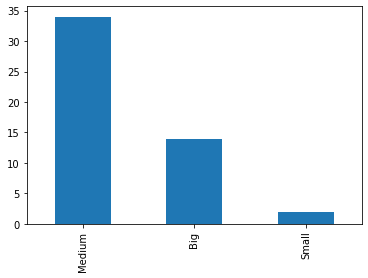

In [27]:
# Plotando gráfico tipo barra
counts.plot.bar()